In [1]:
import os
import PyPDF2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import easyocr

In [2]:
# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

def extract_text_from_pdf_or_image(file_path):
    if file_path.lower().endswith('.pdf'):
        text = extract_text_from_pdf(file_path)
    elif file_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        text = extract_text_from_image(file_path)
    else:
        raise ValueError("Unsupported file format")
    return text

def extract_text_from_pdf(pdf_path):
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfReader(pdf_file)
            text = ""
            for page in pdf_reader.pages:
                text += page.extract_text()
            return text
    except Exception as e:
        print(f"PDF Error: {pdf_path} - {e}")
        return ""

def extract_text_from_image(image_path):
    result = reader.readtext(image_path)
    text = ' '.join([res[1] for res in result])
    return text

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # Remove non-alphanumeric characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text into words
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashfak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracted Text: Personal 
InformationCURRICULUM VITAE
FullNames: Mike KisasatiWanaswa
IDCardNo.22859930
PostalAddress: P.O. Box 85575 80100 Mombasa
TelephoneNo.0717 550926
EmailAddress:mikewanaswa@gmail.co
mLanguages : Well spoken English and 
SwahiliPurpose
To put in use the latest inventions in Telecommunication and Information Technology for a 
positive impact
in Individuals, Business Enterprises and Corporate Organizations.
Work Experience
Date :April 2011 – To Date
Position :Fixed Data Network Technician
Employer :Ben’s Electronics Services Ltd, Mombasa
Duties : Survey, Installation, Integration, Maintenance, Support and 
Decommissioning of Fixed Data Services using various Access
Technologies (WIMAX, FIBER, MICROWAVES and Wi-Fi) for 
SafaricomLtd.
: Survey, Installation and Support of Ceragon’s IP20 Access Technology for 
Airtel (K)
: Survey , Installation and Support of Cambridge P2MP Solutions for 
Safaricom.
: Fiber Optics Splicing and terminations, deployment, support and 
ma

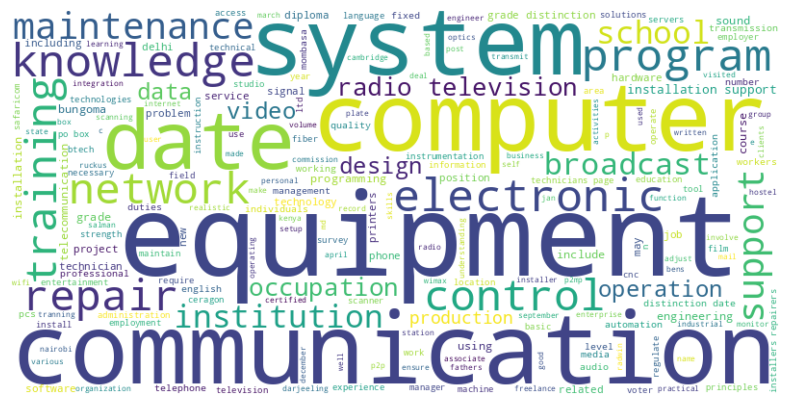

In [4]:
import nltk
nltk.download('stopwords')


file1 = 'D:/Projects/Project Dataset/data classification data/confidential_data/1.pdf'
file2 = 'D:/Projects/Project Dataset/data classification data/confidential_data/4.pdf'
file3 = 'D:/Projects/Project Dataset/data classification data/non_confidential_data/2A2C2V4WI5YRDJHR26XUD4IAULIYGTMA.pdf'

# Extract text from PDF files
pdf_file_paths = [file1, file2, file3]  # Replace with your file paths
corpus = ""
for file_path in pdf_file_paths:
    text = extract_text_from_pdf(file_path)
    print("Extracted Text:", text)
    preprocessed_text = preprocess_text(text)
    print("Preprocessed Text:", preprocessed_text)
    corpus += preprocessed_text

if not corpus:
    print("No text found in the PDF files. Please check the extraction and preprocessing steps.")
else:
    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(corpus)

    # Plot Word Cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [5]:
import concurrent.futures

def create_labeled_dataset(directory, label):
    data = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        file_paths = [os.path.join(directory, file_name) for file_name in os.listdir(directory)]
        results = executor.map(extract_text_from_pdf, file_paths)
        for file_path, text in zip(file_paths, results):
            if text:  # Check if text is not empty
                data.append([file_path, text, label])
            else:
                print(f"Skipped: {file_path} due to unreadable or corrupted PDF")
    return pd.DataFrame(data, columns=['file_path', 'text', 'label'])

In [6]:
# Data Preparation - Combine labeled datasets
confidential_data = create_labeled_dataset('D:/Projects/Project Dataset/data classification data/confidential_data', 'confidential')
non_confidential_data = create_labeled_dataset('D:/Projects/Project Dataset/data classification data/non_confidential_data', 'non-confidential')
dataset = pd.concat([confidential_data, non_confidential_data])


incorrect startxref pointer(1)


PDF Error: D:/Projects/Project Dataset/data classification data/non_confidential_data\3P5D3UKXU2R6I2TK4OJSLL6LGIQJ4NY5.pdf - EOF marker not found


incorrect startxref pointer(3)


PDF Error: D:/Projects/Project Dataset/data classification data/non_confidential_data\4GJGAIUVBMLM3W7O5SV4EKDNKC4DVOCL.pdf - File has not been decrypted
PDF Error: D:/Projects/Project Dataset/data classification data/non_confidential_data\3RCHLDD2YCPDNLHEV4AVKEPBYJP5UBZB.pdf - 'DictionaryObject' object has no attribute 'get_data'


incorrect startxref pointer(3)


Skipped: D:/Projects/Project Dataset/data classification data/non_confidential_data\2FDPTMT2NZDE6RIJSZZXGBMD7LYL7YHV.pdf due to unreadable or corrupted PDF
Skipped: D:/Projects/Project Dataset/data classification data/non_confidential_data\2LVOKCURIEQKLK43I6T7QLYYQX3RQUXX.pdf due to unreadable or corrupted PDF
Skipped: D:/Projects/Project Dataset/data classification data/non_confidential_data\2QWDF5JK4N7WQ4NQRZRLF4CYOUF32WTR.pdf due to unreadable or corrupted PDF
Skipped: D:/Projects/Project Dataset/data classification data/non_confidential_data\2XP6SY3BBU24ICI4JSHCLNQKAKGVMMPG.pdf due to unreadable or corrupted PDF
Skipped: D:/Projects/Project Dataset/data classification data/non_confidential_data\2YS3ALM6OTD5ENWN4Z5LOBWG735756DX.pdf due to unreadable or corrupted PDF
Skipped: D:/Projects/Project Dataset/data classification data/non_confidential_data\3HYJT3CPUFRXVQSY3IJIK5ERD4XWBDUQ.pdf due to unreadable or corrupted PDF
Skipped: D:/Projects/Project Dataset/data classification data/no

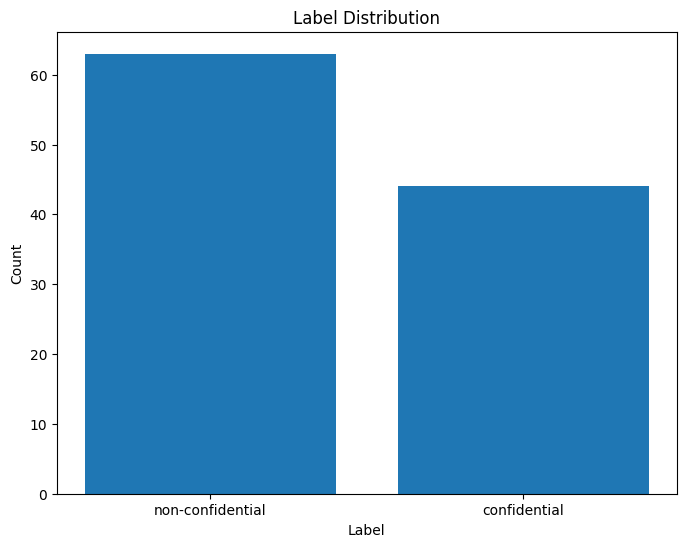

In [7]:
# Plot label distribution
label_counts = dataset['label'].value_counts()
labels = label_counts.index
counts = label_counts.values

plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [8]:
# Data Preprocessing and Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['text'])
y = dataset['label']

In [9]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train and evaluate LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
logreg_report = classification_report(y_test, y_pred_logreg)

# Train and evaluate MultinomialNB
multinomialnb_model = MultinomialNB()
multinomialnb_model.fit(X_train, y_train)
y_pred_multinomialnb = multinomialnb_model.predict(X_test)
multinomialnb_report = classification_report(y_test, y_pred_multinomialnb)

# Train and evaluate RandomForestClassifier
randomforest_model = RandomForestClassifier()
randomforest_model.fit(X_train, y_train)
y_pred_randomforest = randomforest_model.predict(X_test)
randomforest_report = classification_report(y_test, y_pred_randomforest)



In [11]:
# Print classification reports for each model
print("Logistic Regression:")
print(logreg_report)

print("Multinomial Naive Bayes:")
print(multinomialnb_report)

print("Random Forest Classifier:")
print(randomforest_report)

Logistic Regression:
                  precision    recall  f1-score   support

    confidential       1.00      1.00      1.00         9
non-confidential       1.00      1.00      1.00        13

        accuracy                           1.00        22
       macro avg       1.00      1.00      1.00        22
    weighted avg       1.00      1.00      1.00        22

Multinomial Naive Bayes:
                  precision    recall  f1-score   support

    confidential       1.00      1.00      1.00         9
non-confidential       1.00      1.00      1.00        13

        accuracy                           1.00        22
       macro avg       1.00      1.00      1.00        22
    weighted avg       1.00      1.00      1.00        22

Random Forest Classifier:
                  precision    recall  f1-score   support

    confidential       1.00      1.00      1.00         9
non-confidential       1.00      1.00      1.00        13

        accuracy                           1.00   

In [12]:
import joblib

# Save the trained RF model
model_filename = 'RF_model.pkl'
joblib.dump(randomforest_model, model_filename)
print(f"Trained model saved as {model_filename}")

Trained model saved as RF_model.pkl


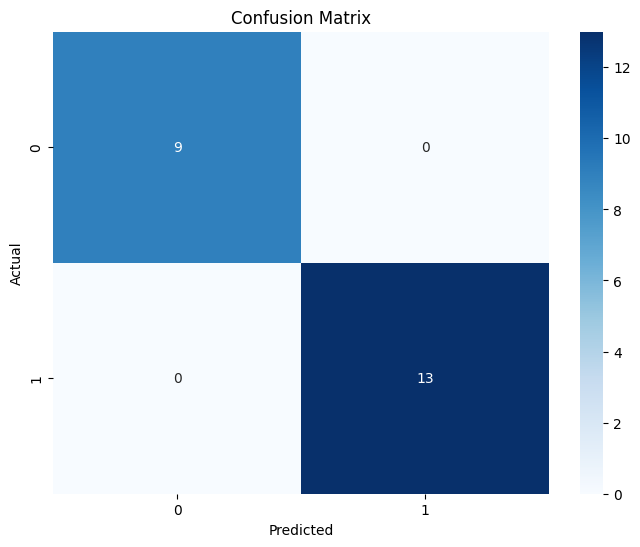

In [13]:
from sklearn.metrics import confusion_matrix
# %pip install seaborn
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_randomforest)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
import easyocr
import PyPDF2
import joblib

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Load the trained Random Forest model
randomforest_model = joblib.load('RF_model.pkl')

def extract_text_from_pdf(pdf_path):
    with open(pdf_path, 'rb') as pdf_file:
        pdf_reader = PyPDF2.PdfReader(pdf_file)
        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
        return text

def extract_text_from_image(image_path):
    result = reader.readtext(image_path)
    text = ' '.join([res[1] for res in result])
    return text

def contains_pii(text):
    pii_keywords = [
        'SSN', 'Social Security Number', 'DOB', 'Date of Birth', 'Name', 'Address',
        'Phone Number', 'Phone', 'E-mail', 'EmailAddress', 'Credit Card Number',
        'FullNames', 'IDCardNo', 'TelephoneNo', 'Contact'
    ]
    for keyword in pii_keywords:
        if keyword.lower() in text.lower():
            return True
    return False

def predict_confidentiality(text):
    features = vectorizer.transform([text]) 
    prediction = randomforest_model.predict(features)
    return prediction[0]

file_path = 'C:/Users/Ashfak/Downloads/Final PPT.pdf'

if file_path.lower().endswith('.pdf'):
    prediction = predict_confidentiality(file_path)
elif file_path.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    extracted_text = extract_text_from_image(file_path)
    print("Extracted Text:", extracted_text)
    
    prediction = "Confidential" if contains_pii(extracted_text) else "Non-Confidential"

else:
    raise ValueError("Unsupported file format")

print(prediction)

# Save modified text file
output_filename = 'confidentiality.txt'
with open(output_filename, 'w', encoding='utf-8') as output_file:
    output_file.write(f"Confidentiality: {prediction}\n\n")
    output_file.write(extracted_text)

print(f"Modified text file saved as '{output_filename}'")

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


non-confidential
Modified PDF file saved as 'confidentiality.pdf'
